<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Helmet Detection using YOLO11</h2>

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Overview of the Helmet Detection Dataset</h2>
  <hr style="border: 1px solid #ff4c4c;">
  <ul style="padding-left: 20px;">
    <li><strong>Source:</strong> The dataset was sourced and downloaded from Roboflow, utilizing their workspace for efficient project management.</li>
    <li><strong>Purpose:</strong> Specifically curated for detecting helmets in various scenarios, aiding safety compliance automation.</li>
    <li><strong>Format:</strong> The dataset is formatted for YOLOv11 and provides bounding box annotations in the PASCAL VOC format.</li>
    <li><strong>Content:</strong> Contains 764 annotated images of two distinct classes for the objective of helmet detection.</li>
    <li><strong>Classes:</strong>
      <ul style="padding-left: 40px; list-style-type: circle;">
        <li>With helmet</li>
        <li>Without helmet</li>
      </ul>
    </li>
    <li><strong>Use Case:</strong> Ideal for developing machine learning models focused on workplace safety, traffic management, and compliance monitoring.</li>
  </ul>
</div>


In [1]:
!nvidia-smi

Sat Feb  1 06:17:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Step 01 # Install the Ultralytics Package

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 20.3 MB/s eta 0:00:00


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">  Step 02: Import Libraries</h2>

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6095.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">  Step 03: Download Dataset from Roboflow</h2>

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detector-1 in yolov11:: 100%|██████████| 5696/5696 [00:00<00:00, 8381.95it/s]


In [6]:
dataset.location

'/kaggle/working/Helmet-Detector-1'

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;"> Step 02: Train YOLO11 Model</h2>

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 94.6MB/s]
Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/Helmet-Detector-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">  Step 05: Training Results</h2>

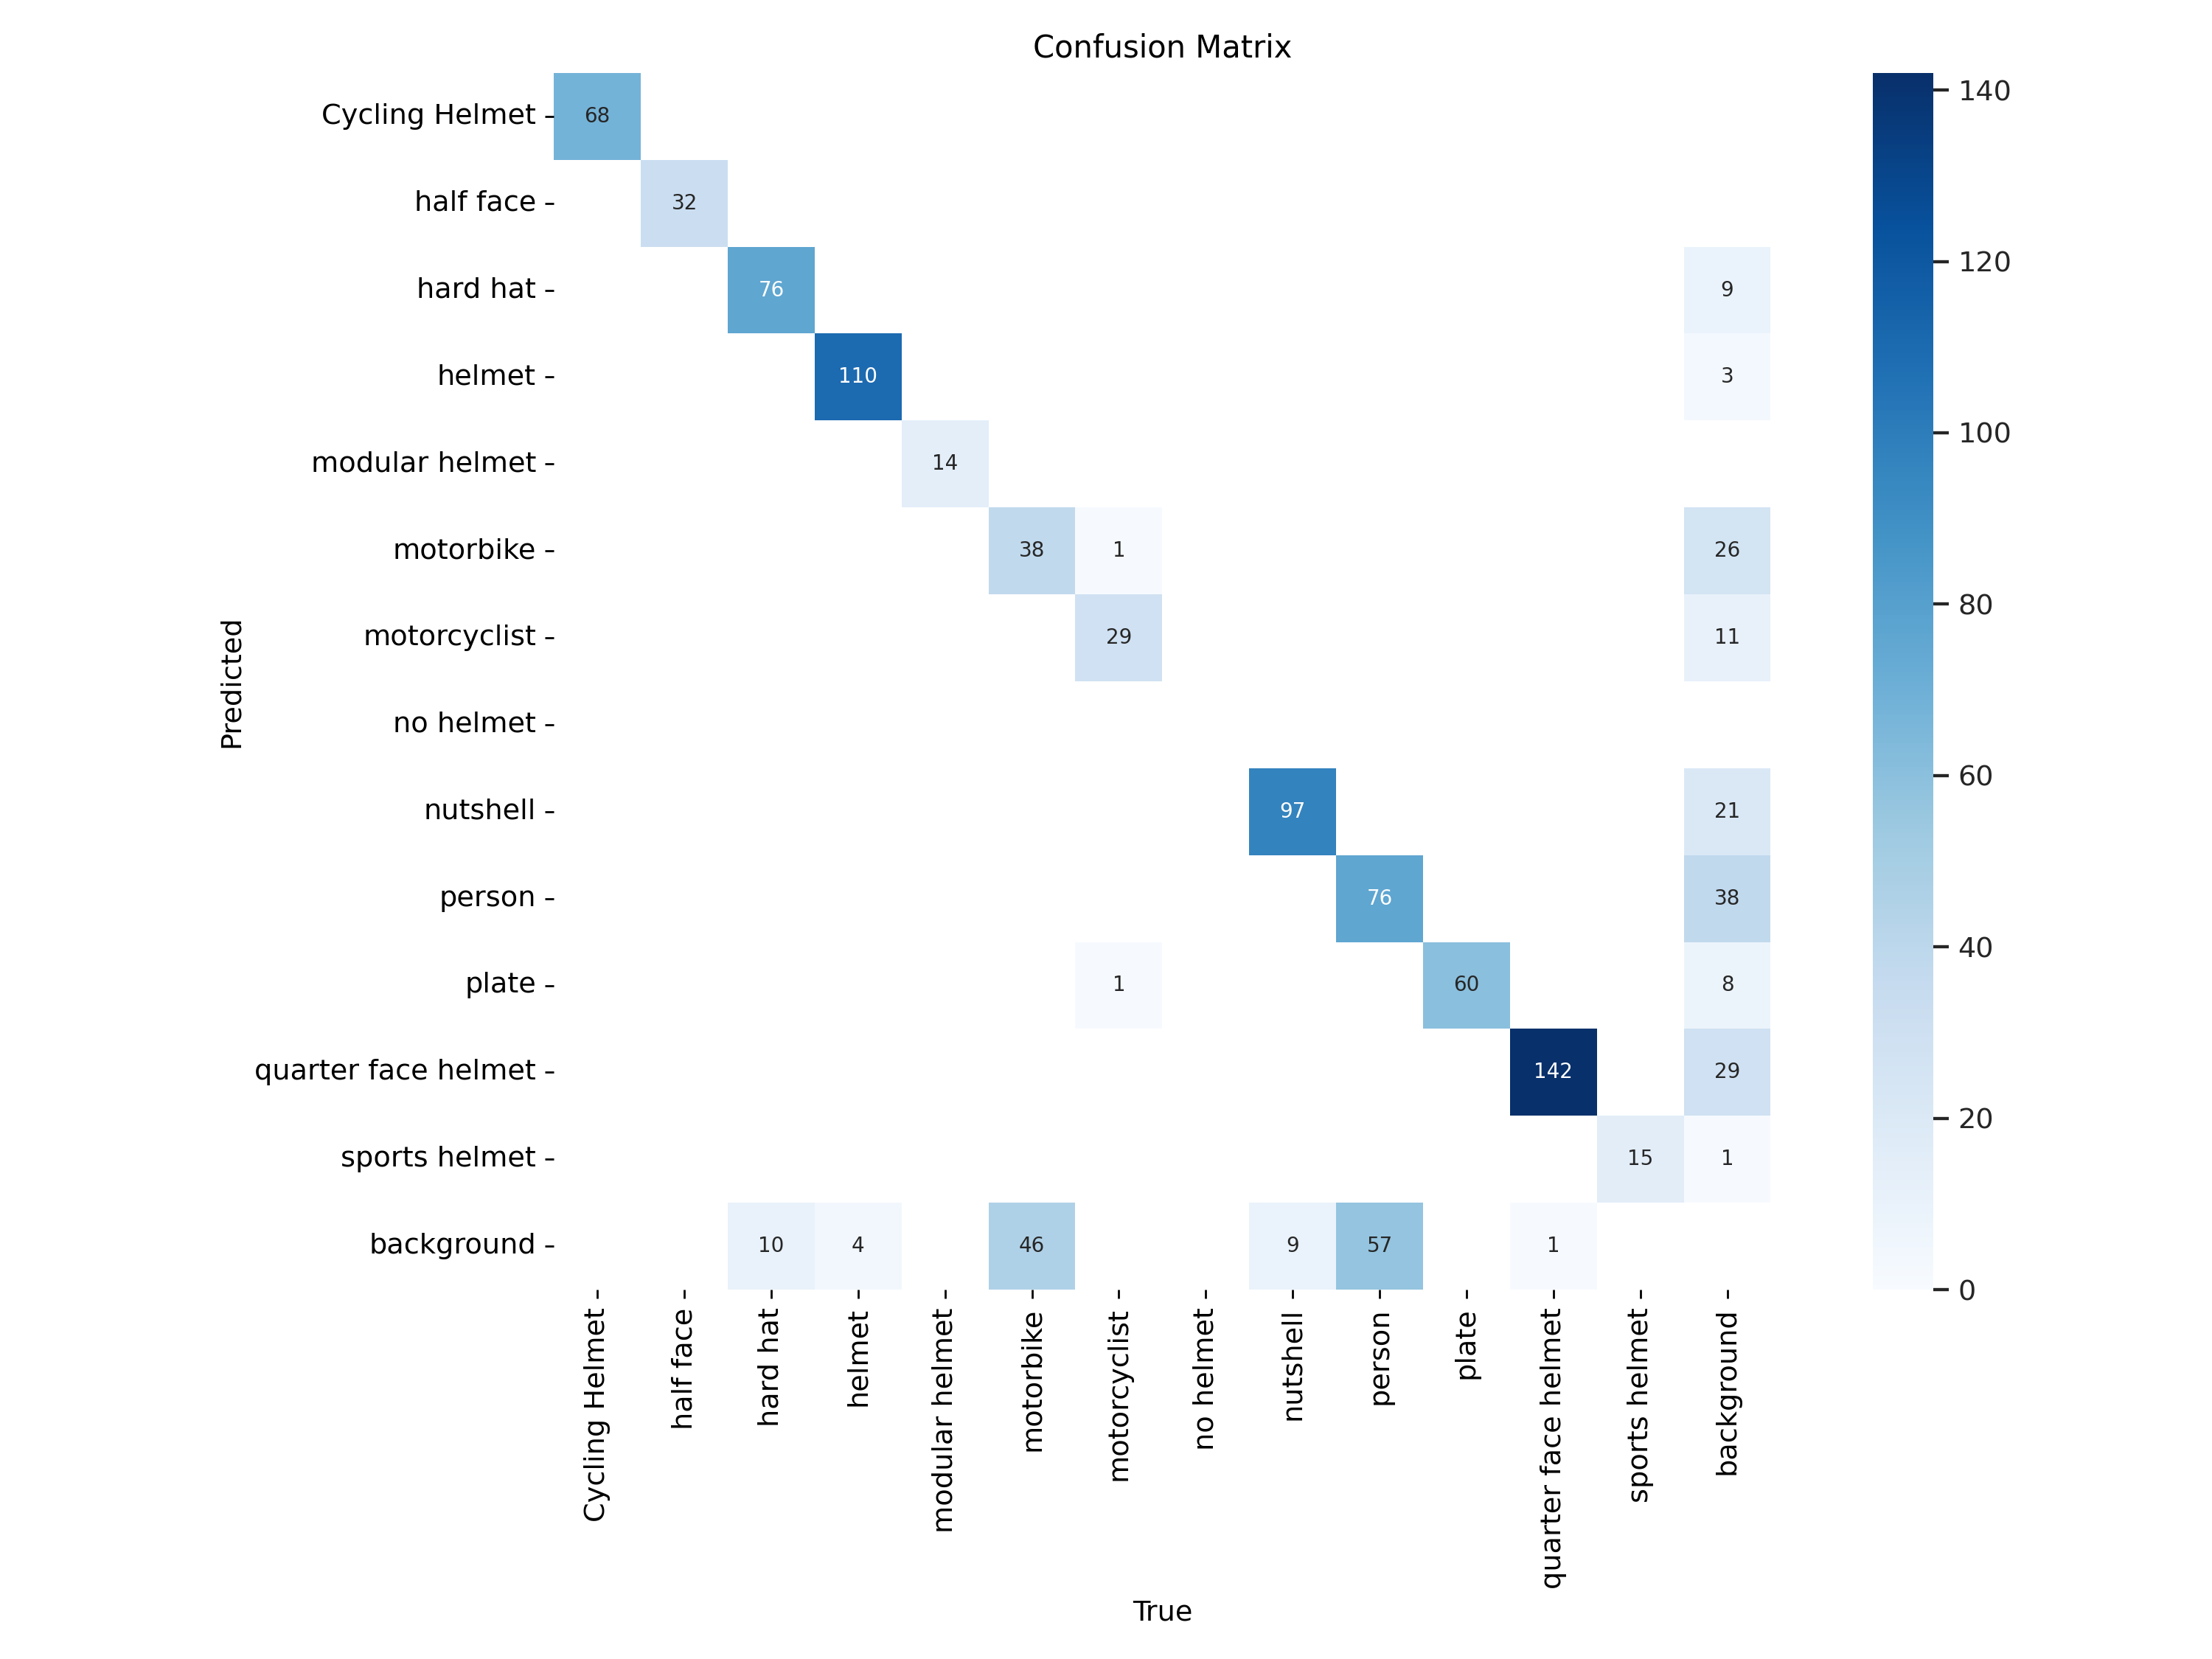

In [8]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000)

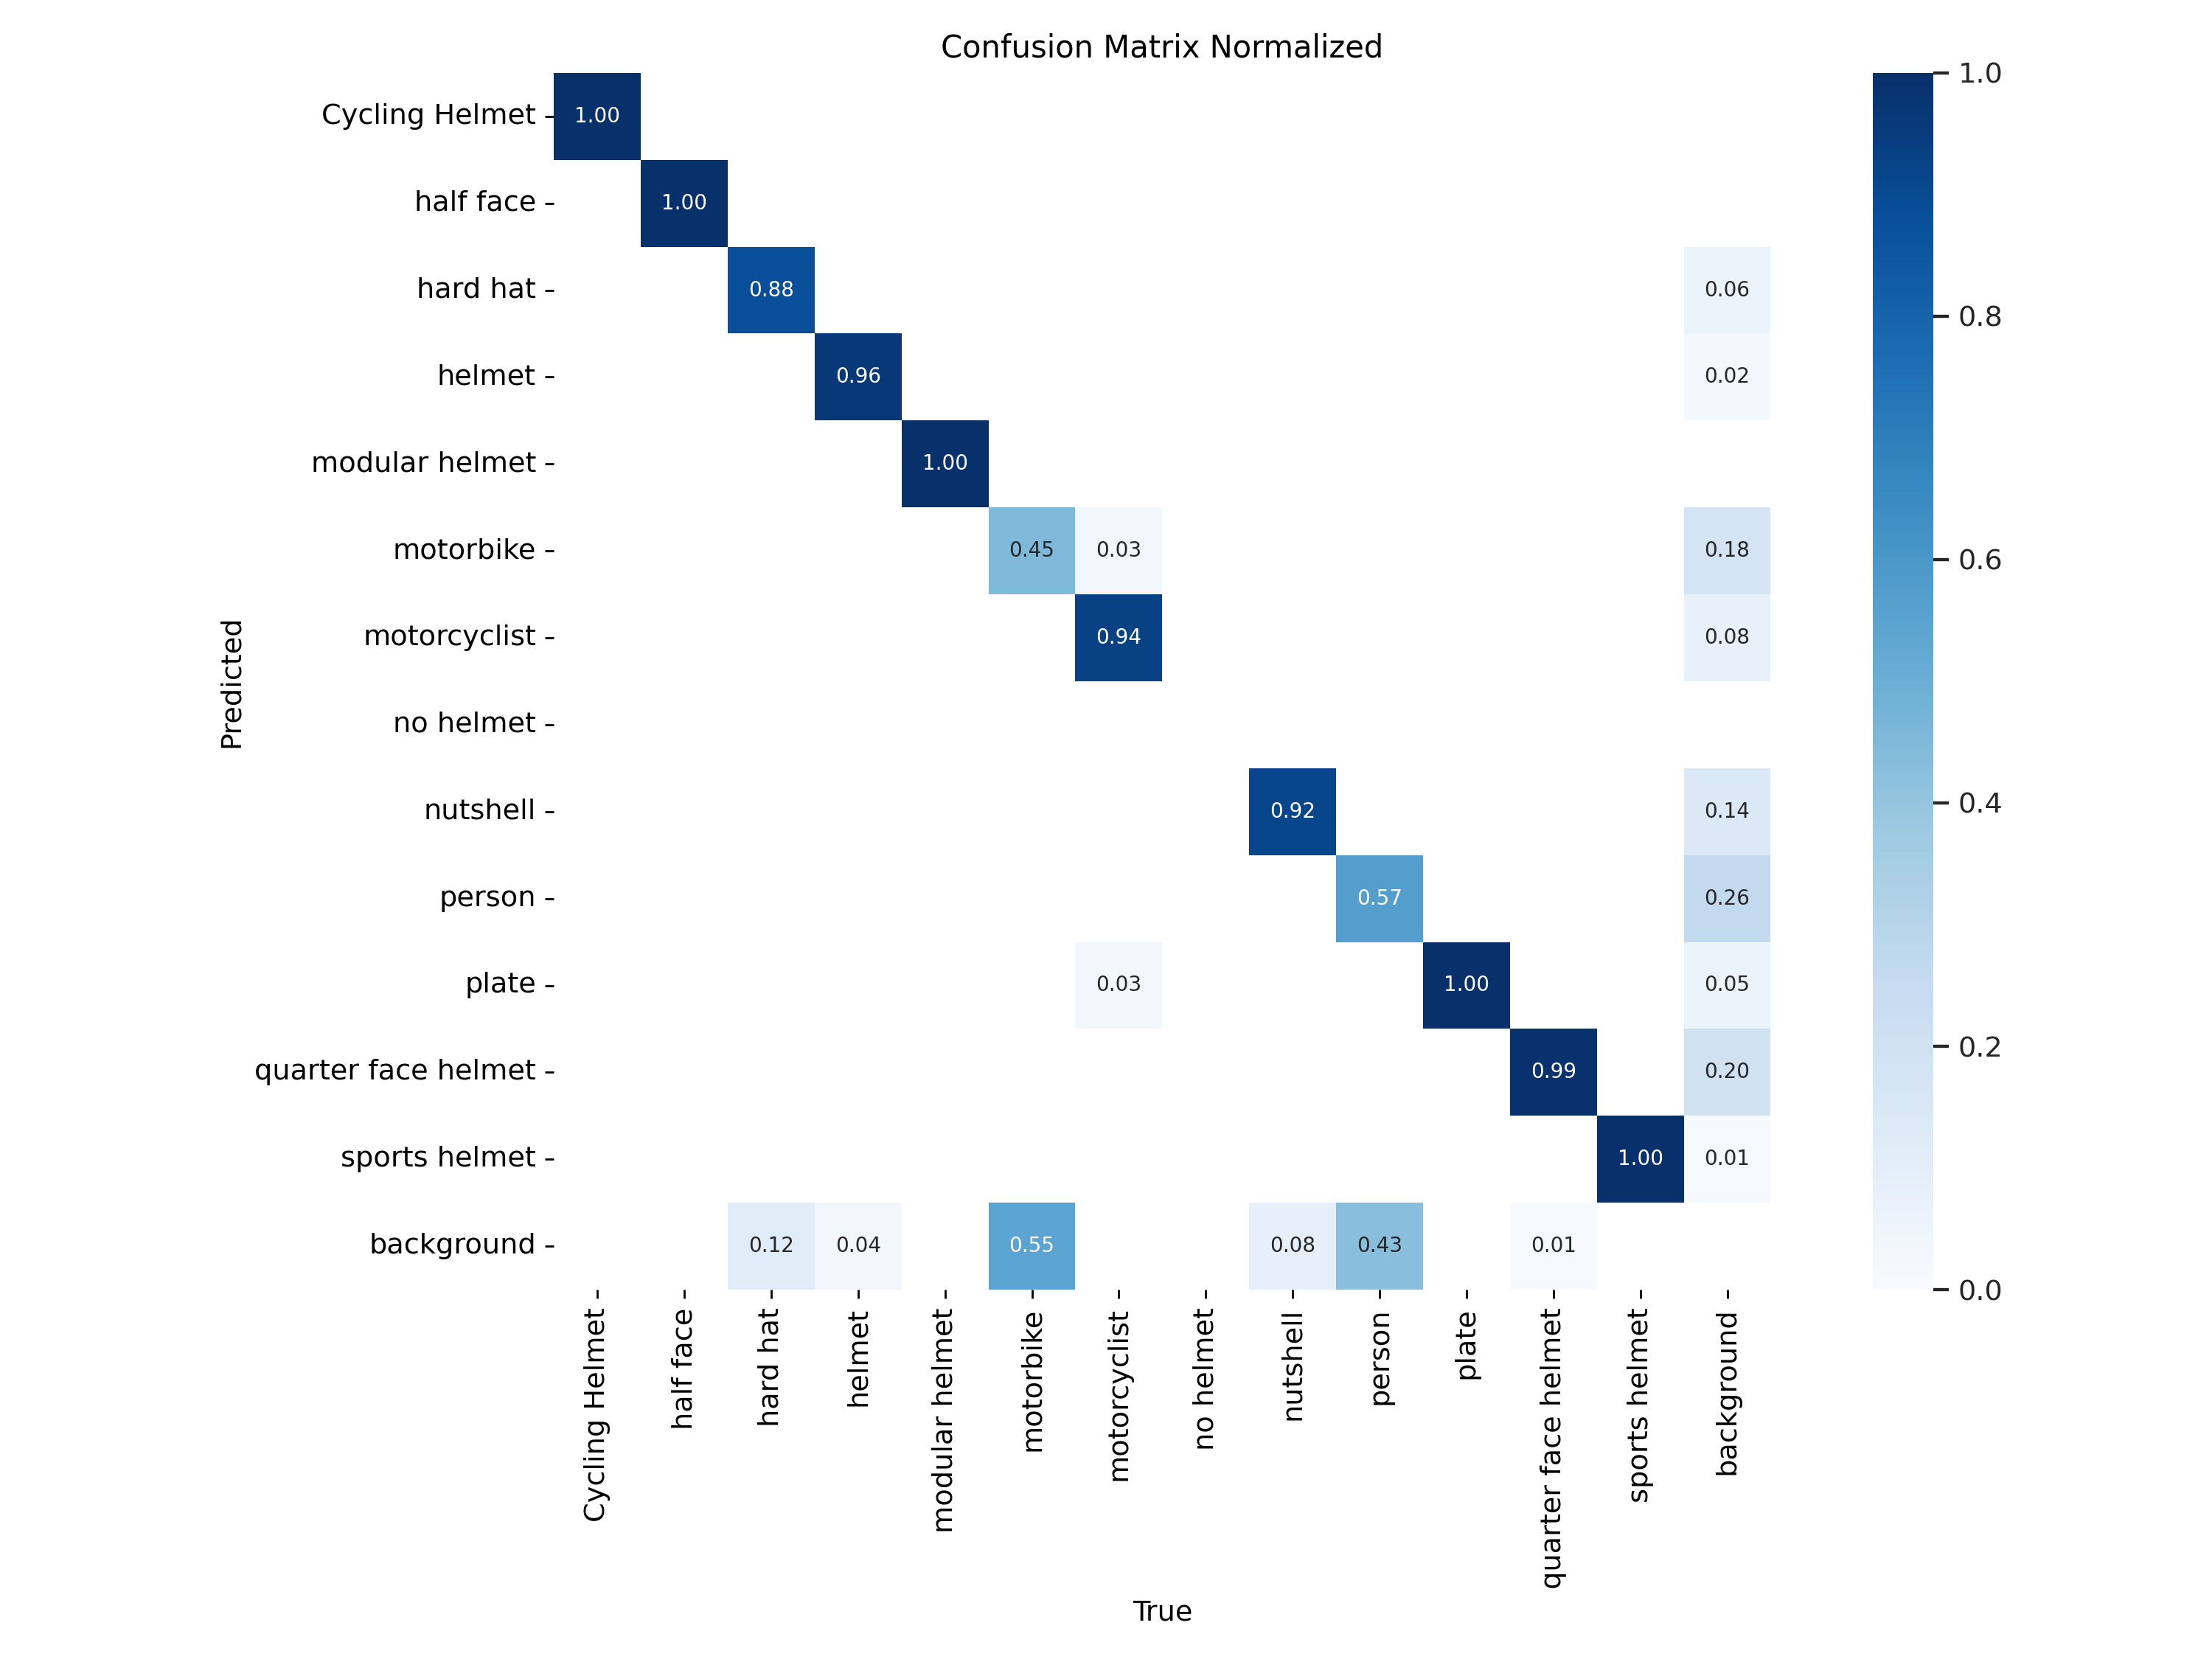

In [9]:
Image("/kaggle/working/runs/detect/train/confusion_matrix_normalized.png", width=1000)

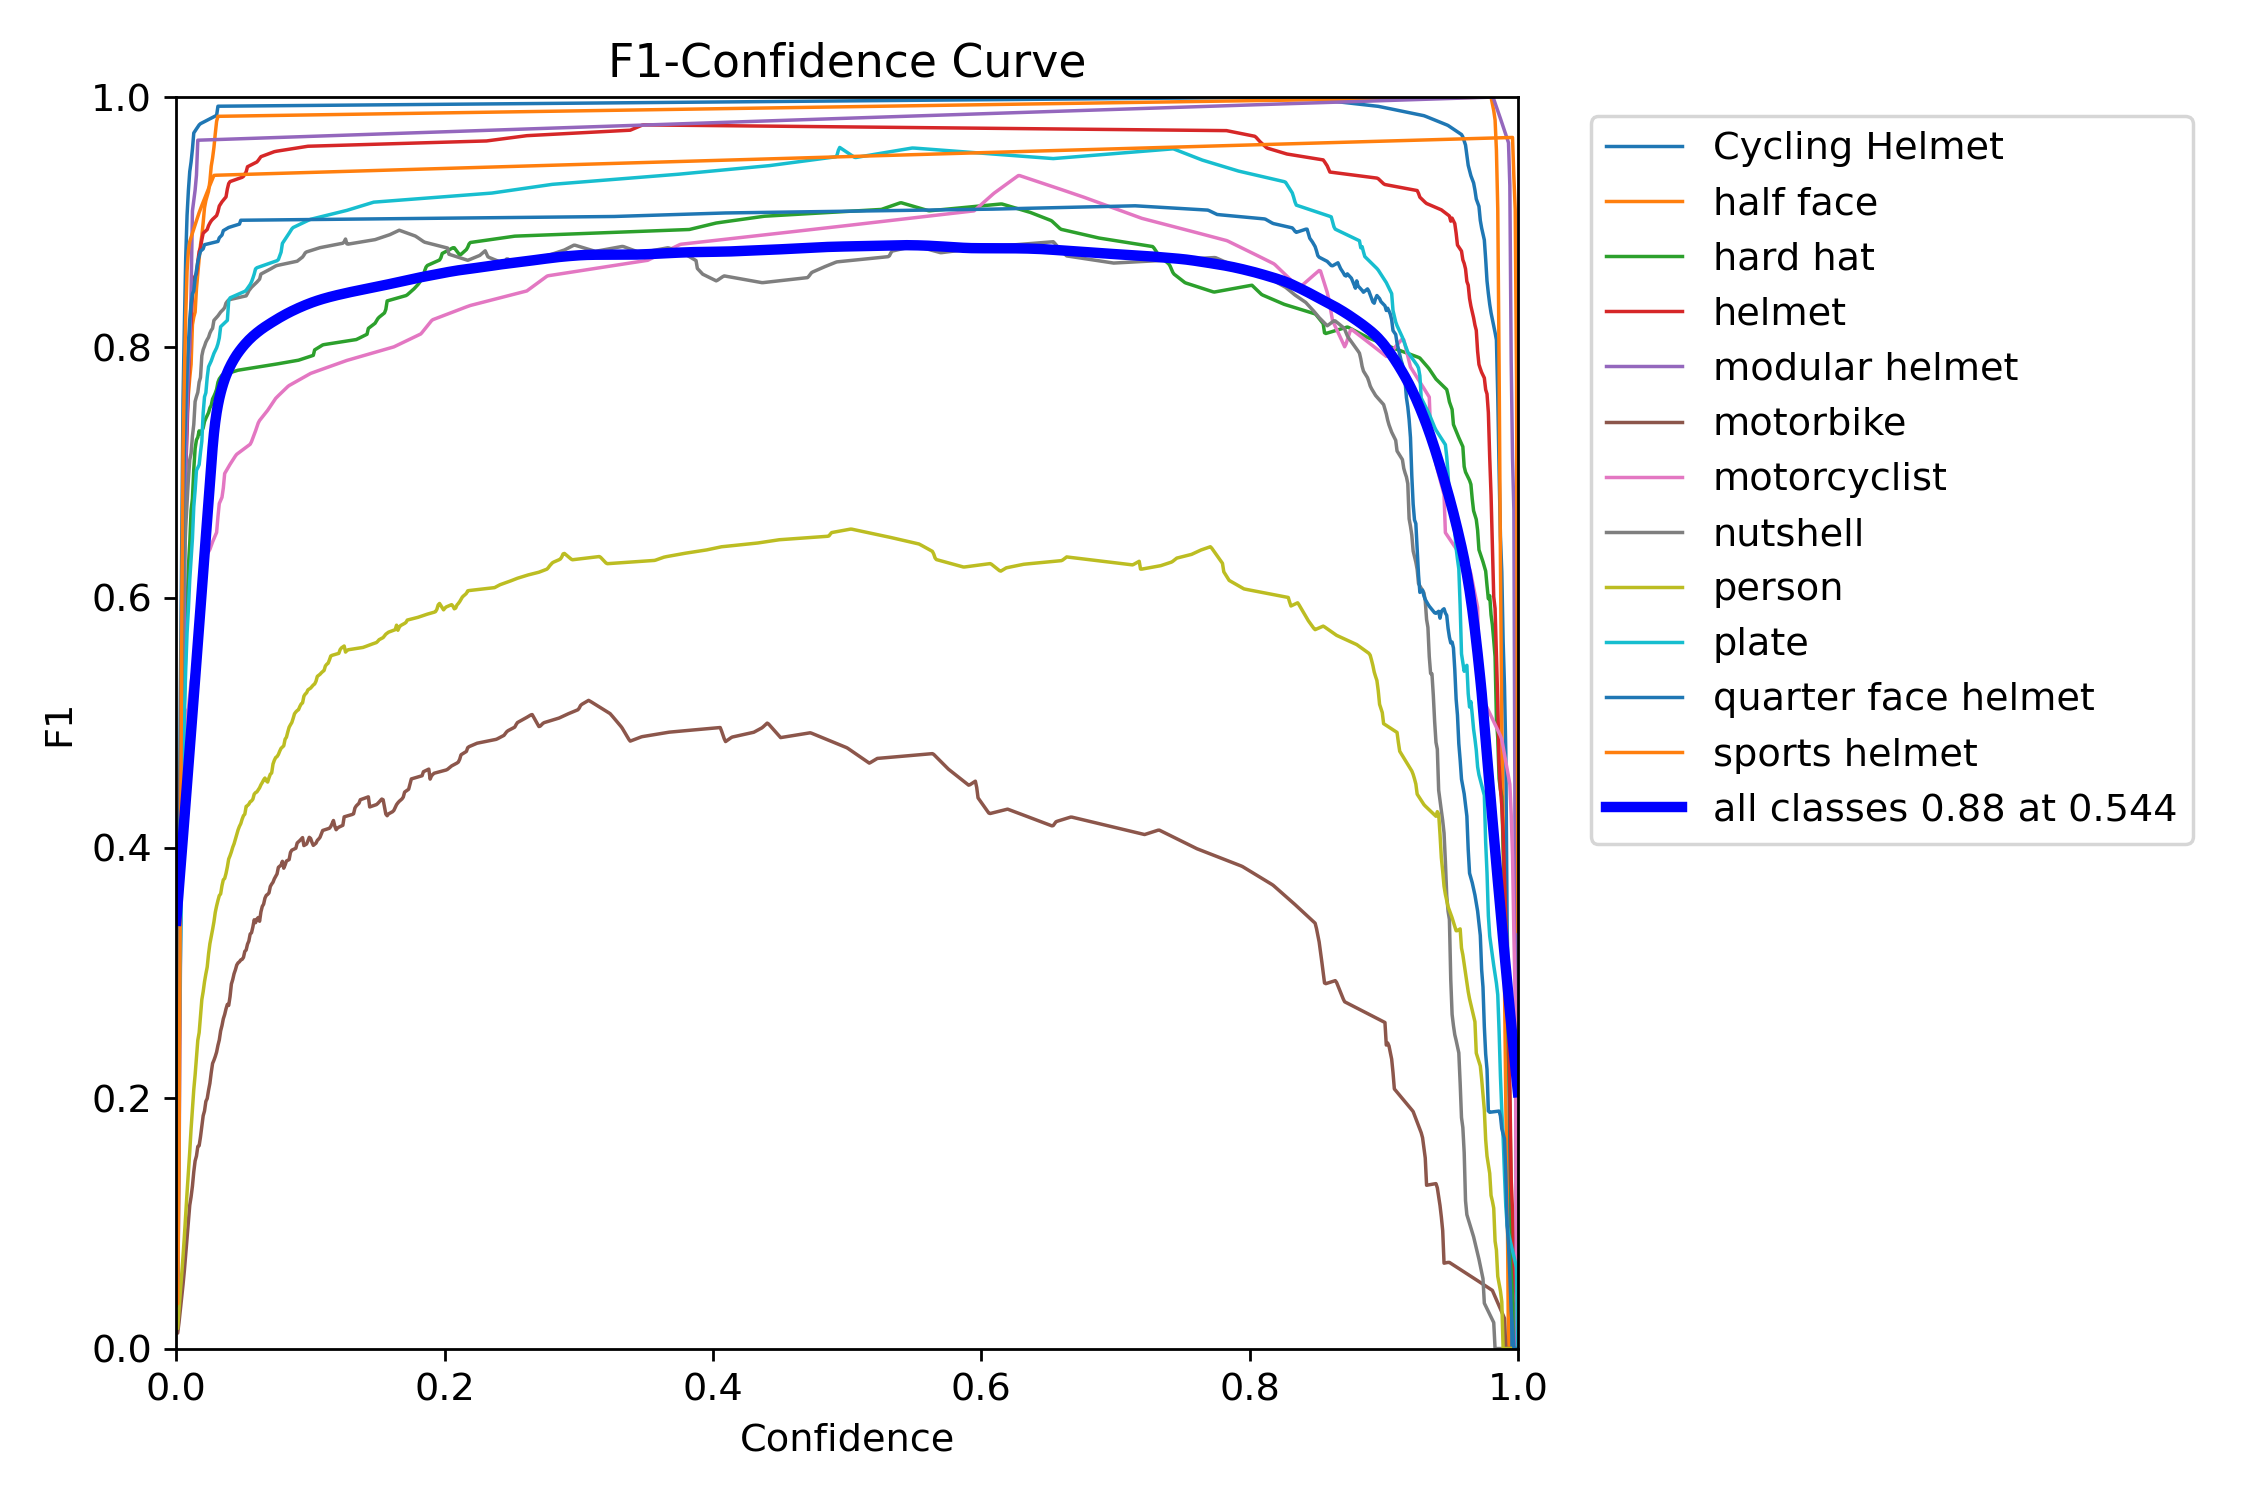

In [10]:
Image("/kaggle/working/runs/detect/train/F1_curve.png", width=1000)

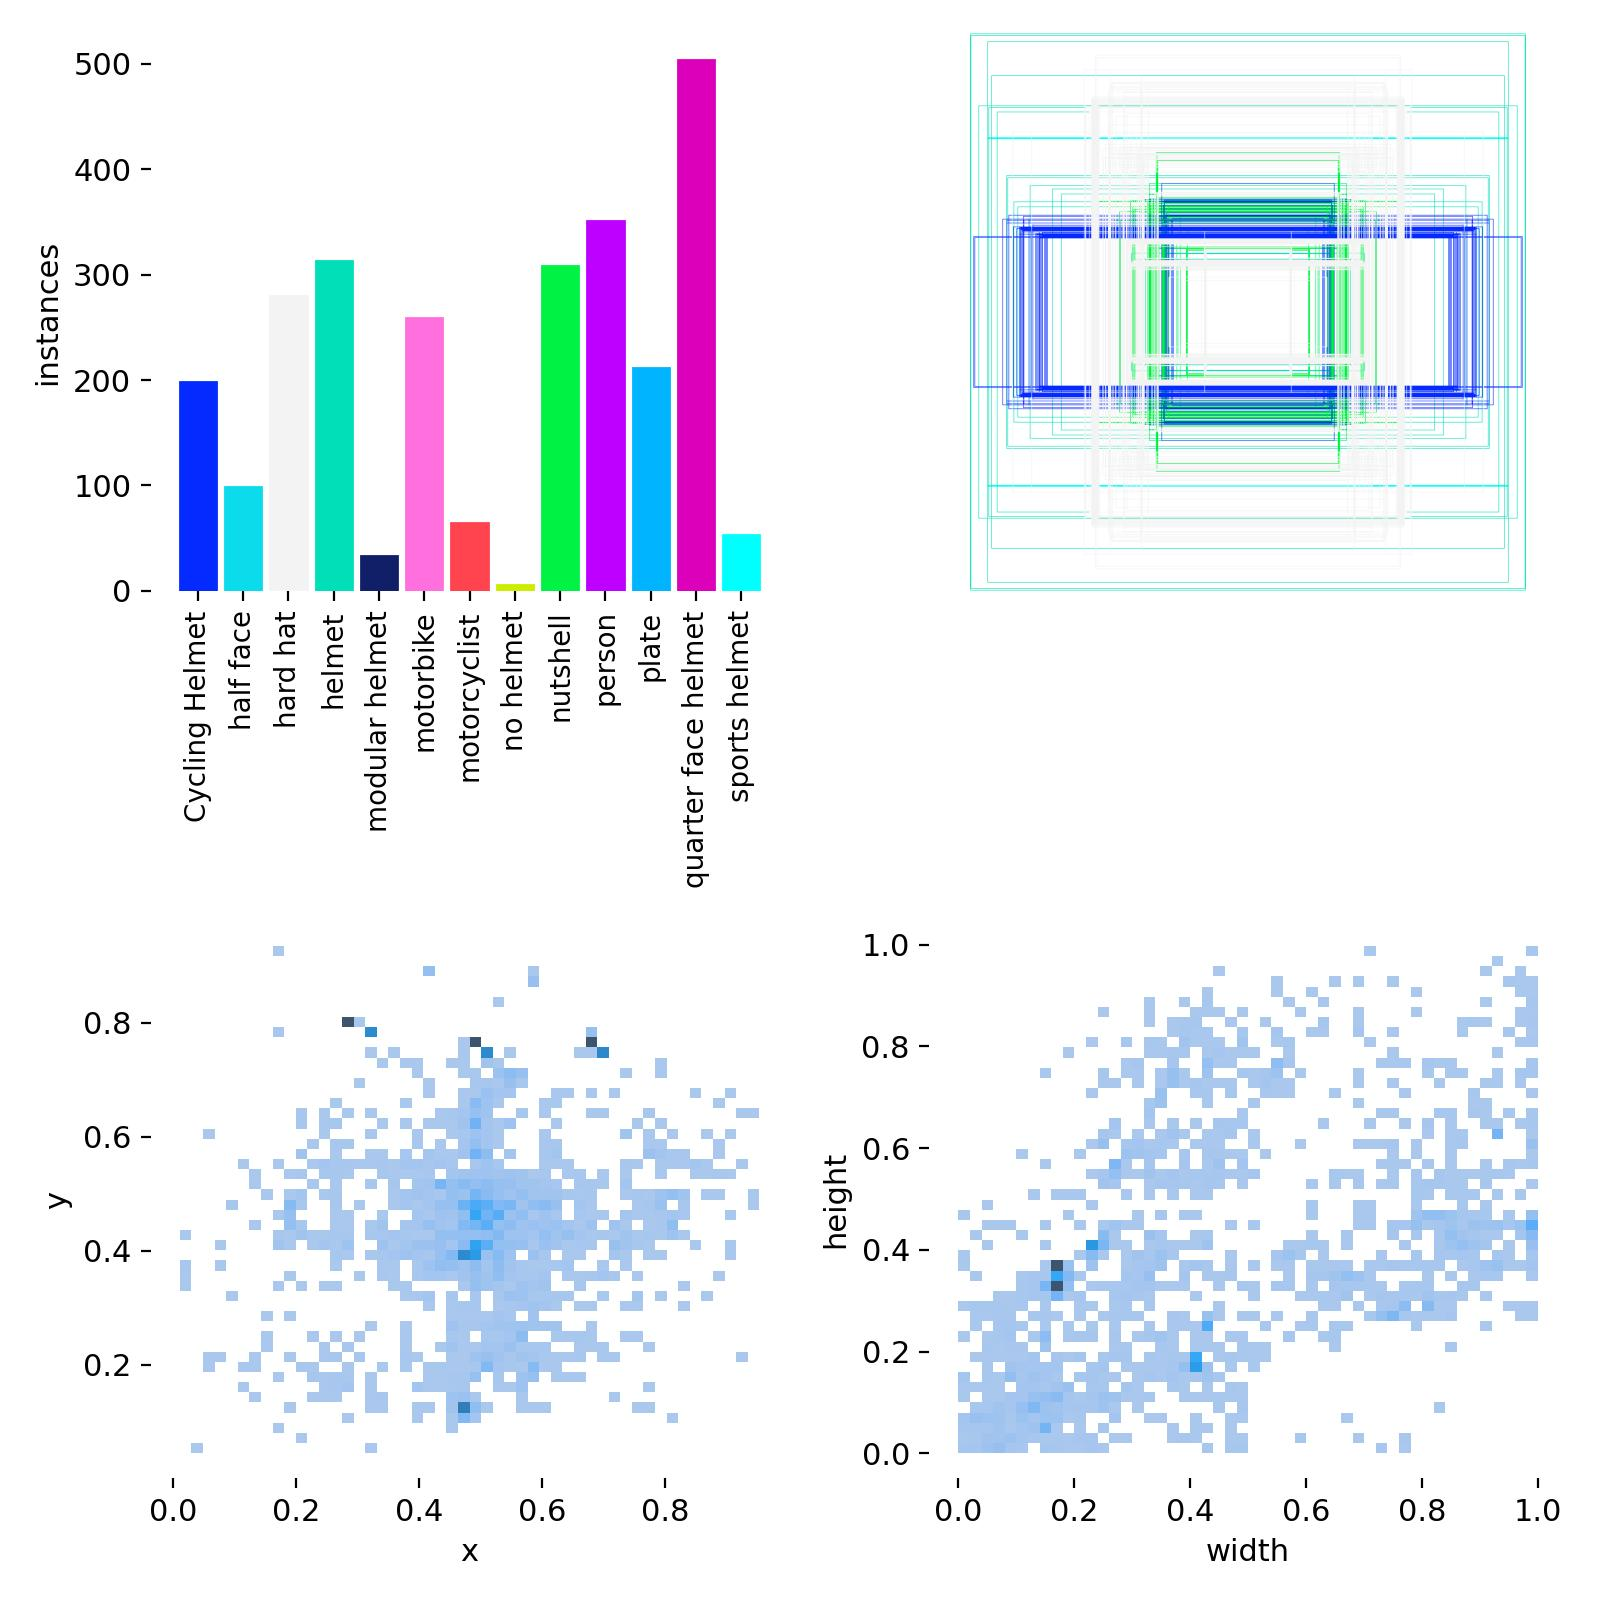

In [11]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=1000)

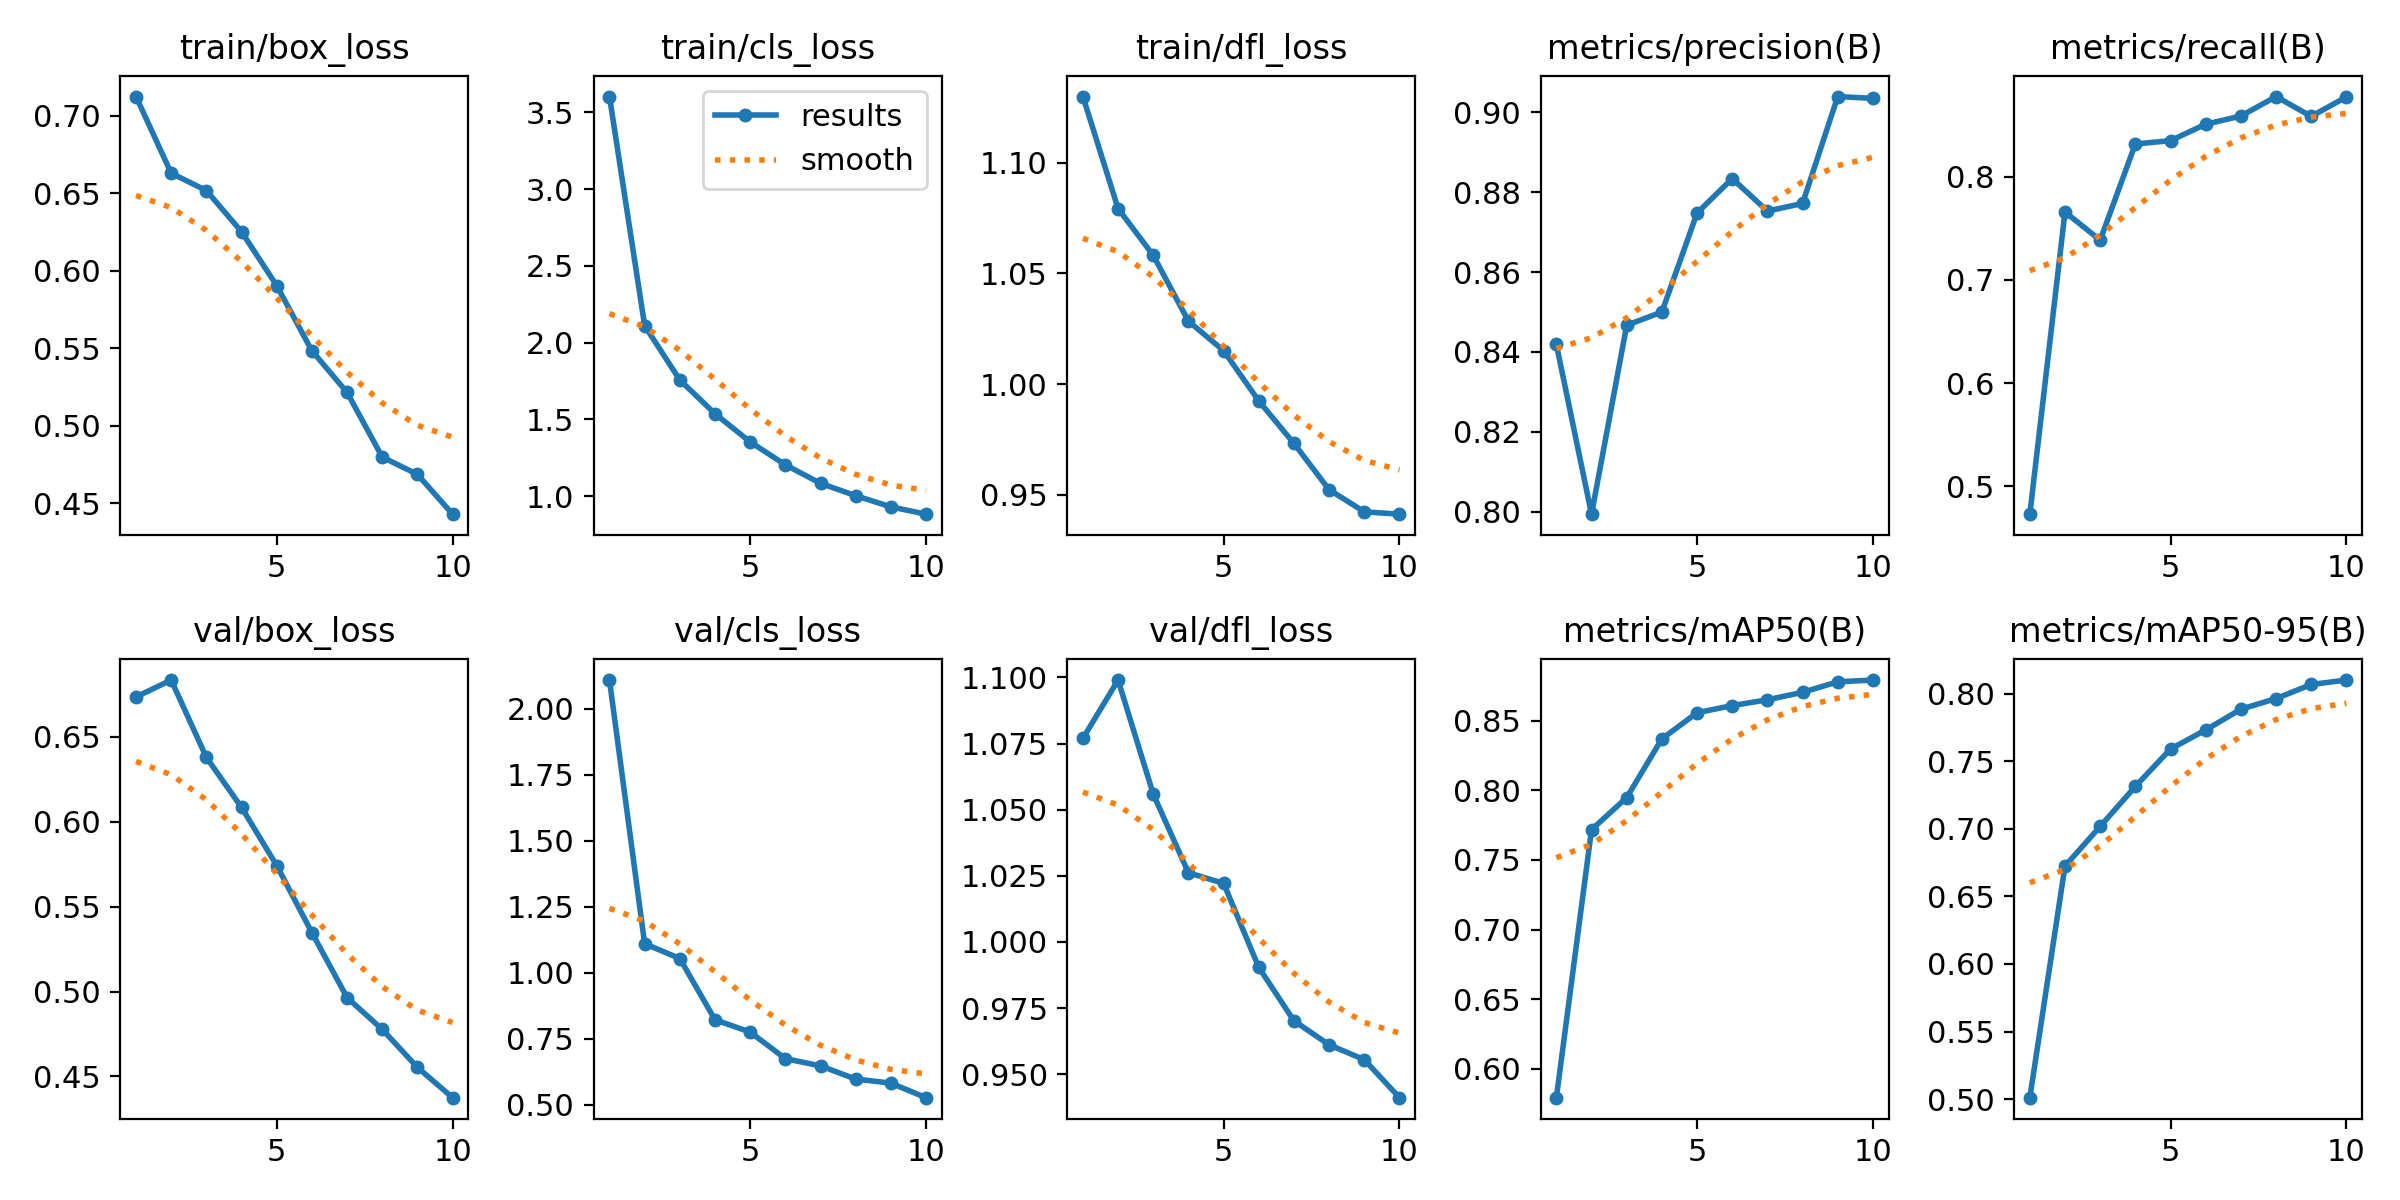

In [12]:
Image("/kaggle/working/runs/detect/train/results.png", width=1000)

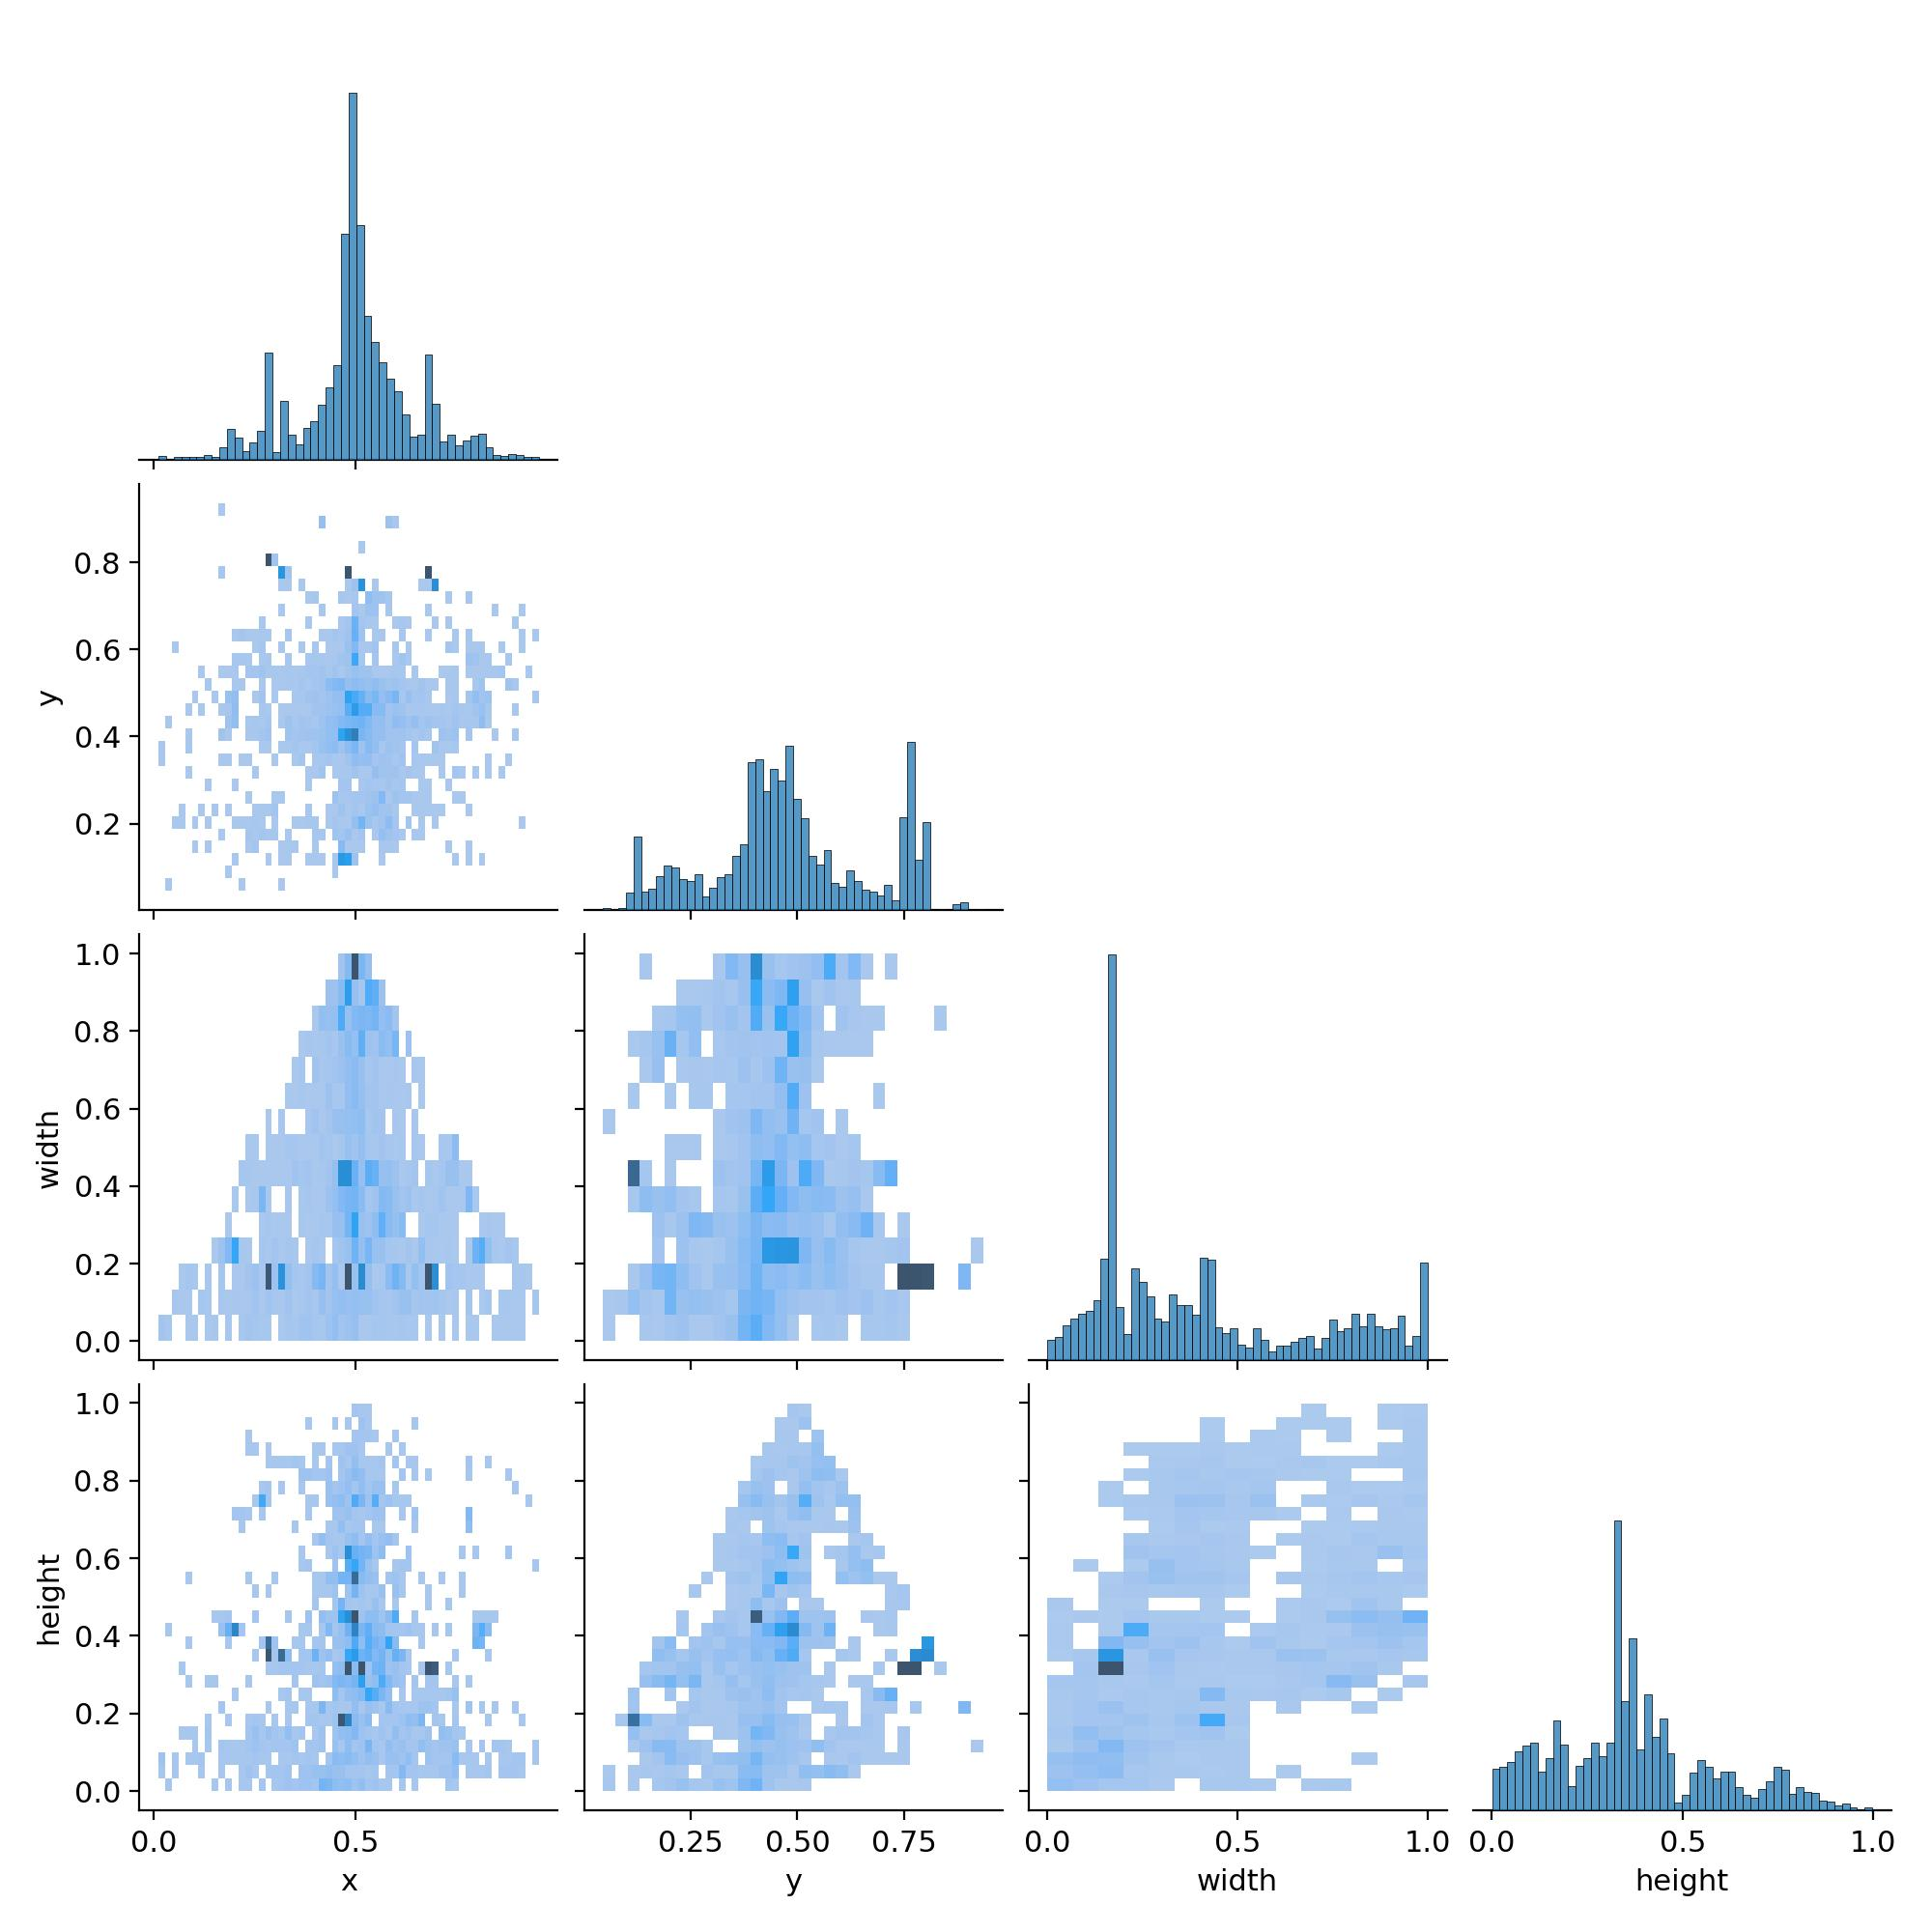

In [13]:
Image("/kaggle/working/runs/detect/train/labels_correlogram.jpg", width=1000)

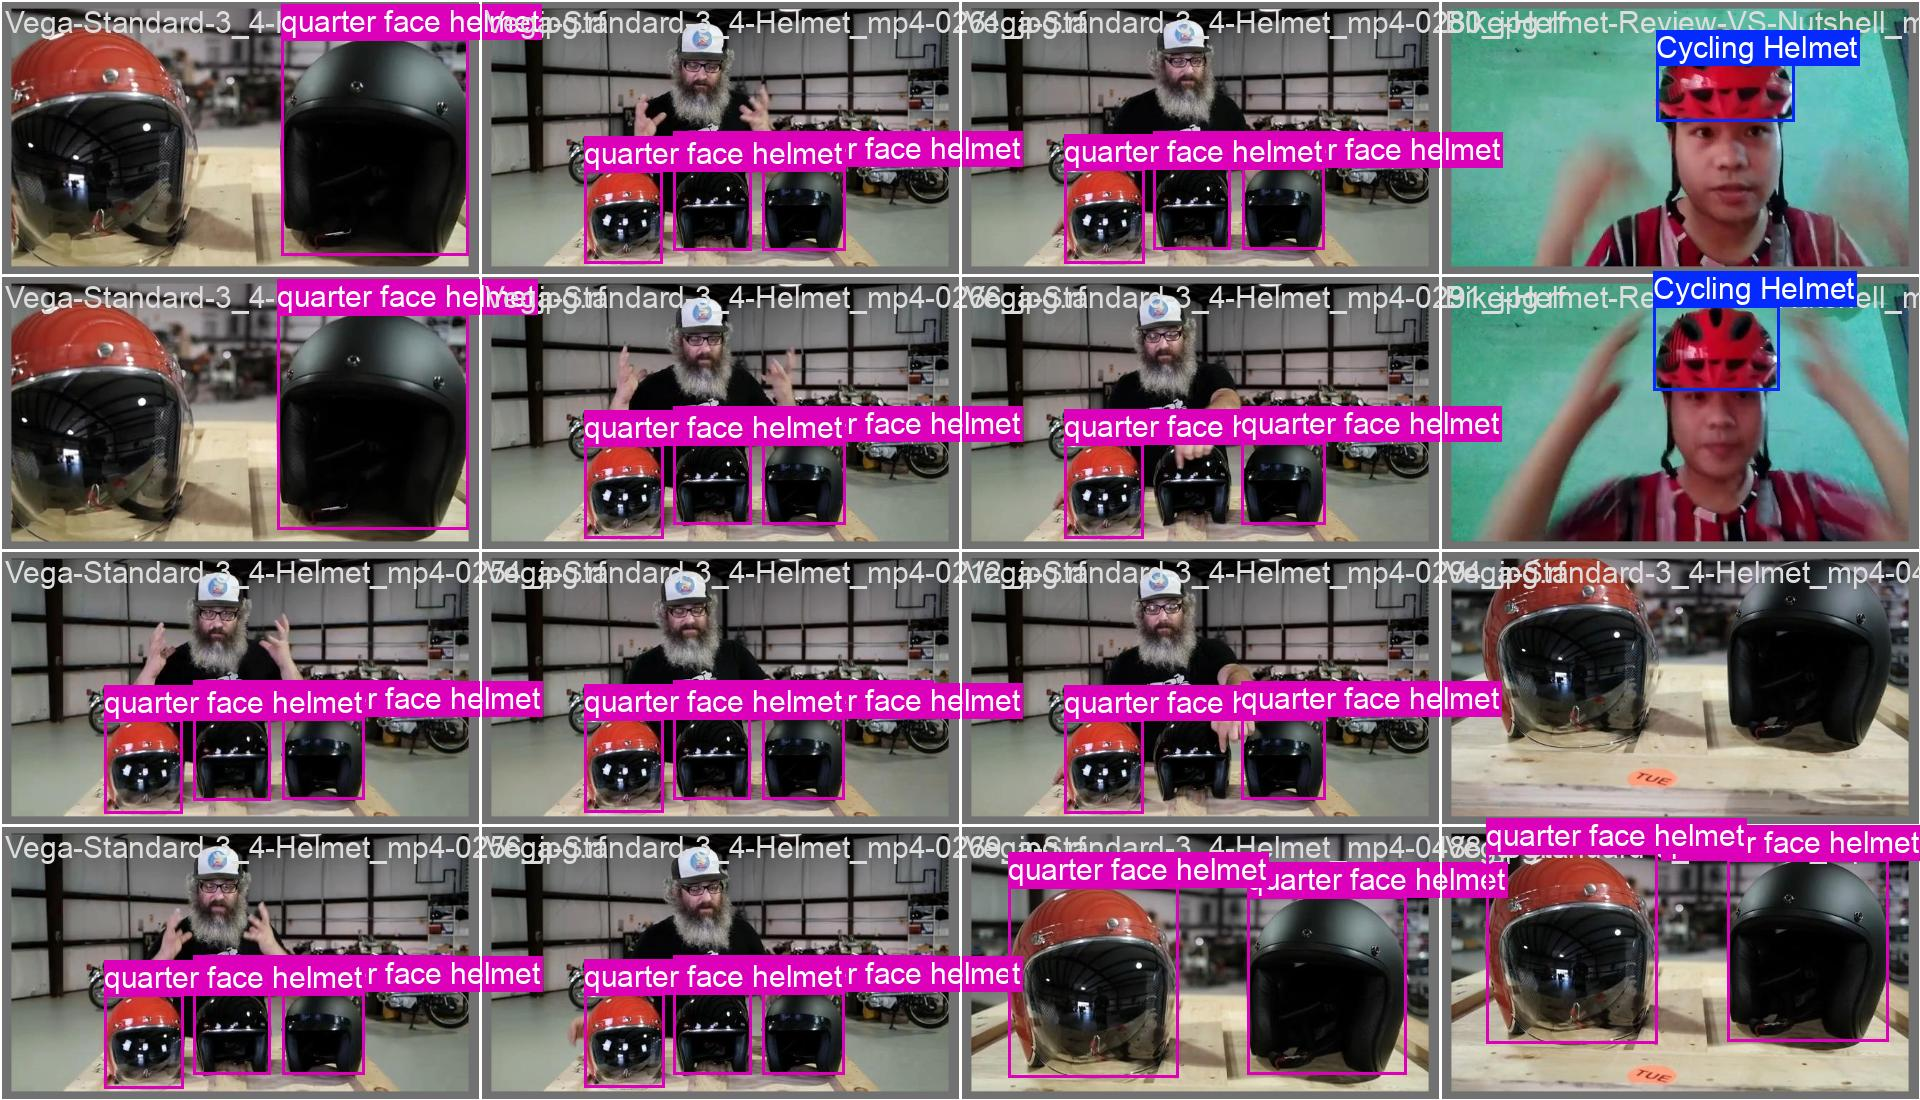

In [14]:
Image("/kaggle/working/runs/detect/train/val_batch2_labels.jpg", width=1000)

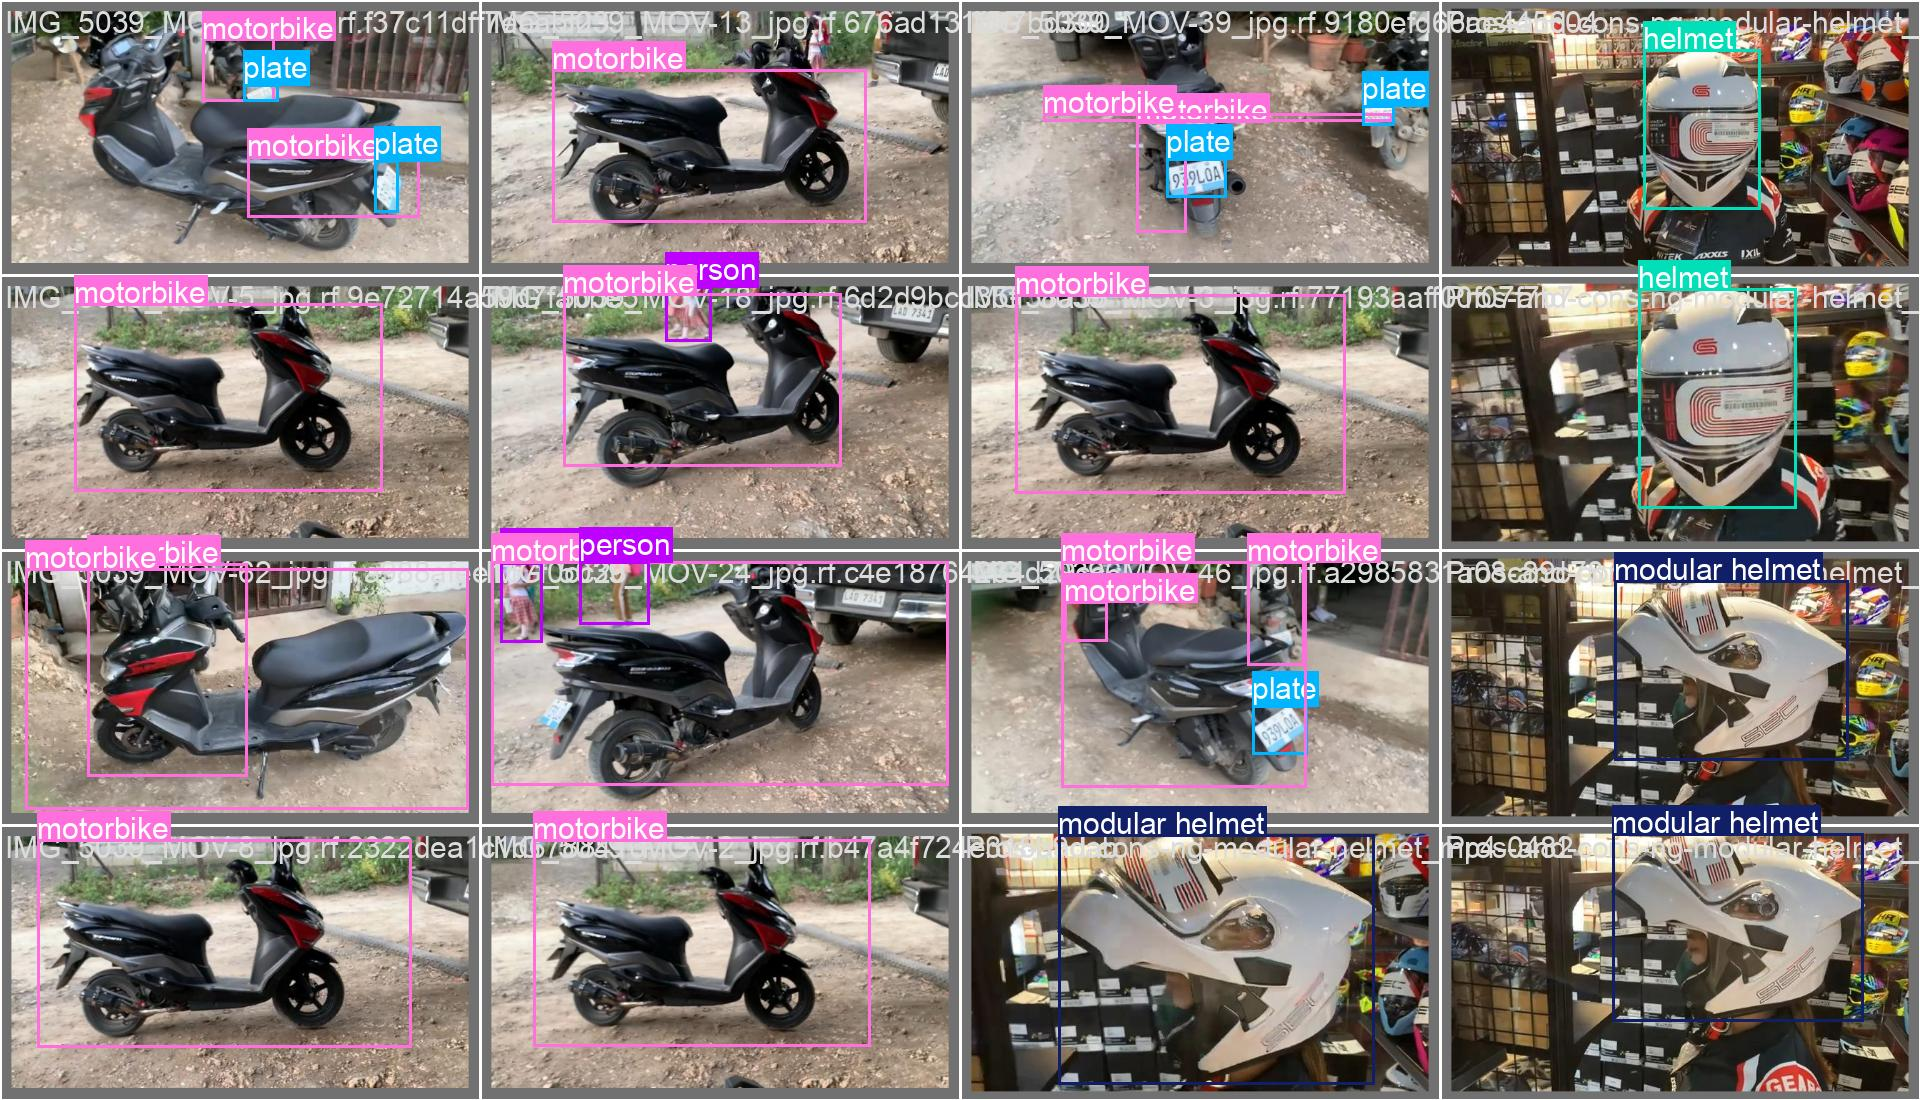

In [15]:
Image("/kaggle/working/runs/detect/train/val_batch0_labels.jpg", width=1000)

## Step # 08 Inference with Custom Model on Images

In [16]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/568 /kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0178_jpg.rf.40daedd08d8ee073d606a4e59773f75d.jpg: 640x384 1 sports helmet, 57.7ms
image 2/568 /kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.53fbc18ec2d3dbc33fa2ca90fe4d27f6.jpg: 640x384 1 sports helmet, 9.0ms
image 3/568 /kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0186_jpg.rf.4b0cfc853a5cddb12cc069cd568ee13f.jpg: 640x384 1 sports helmet, 9.6ms
image 4/568 /kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.ab2c103b611fa0377e8d8833d0d99e72.jpg: 640x384 1 sports helmet, 8.2ms
image 5/568 /kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.

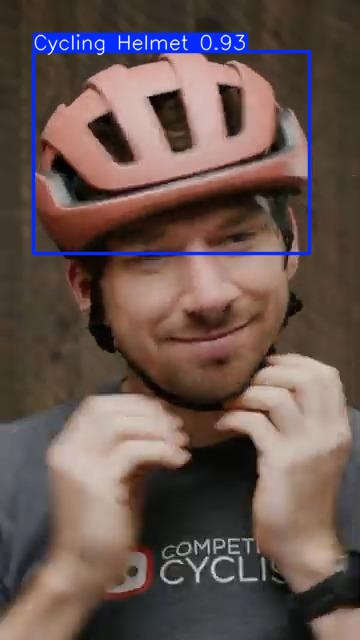

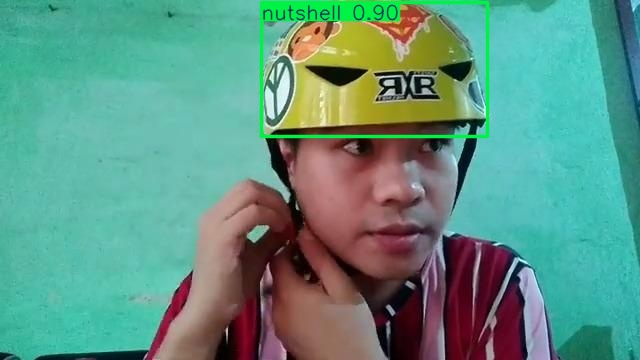

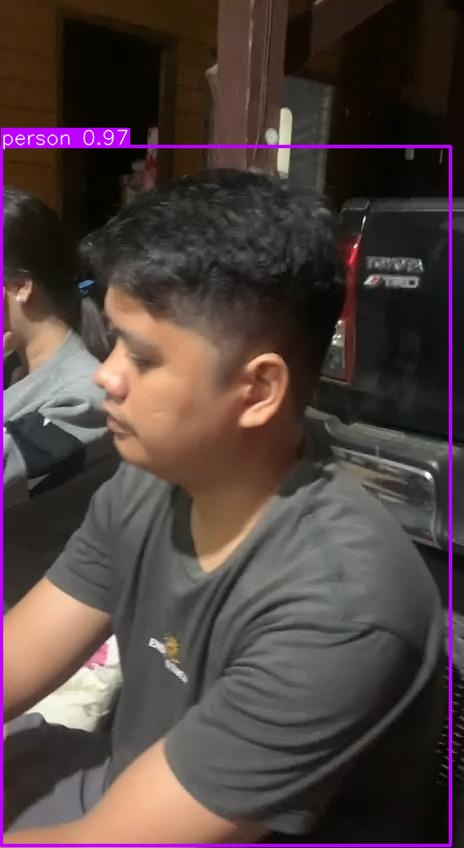

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

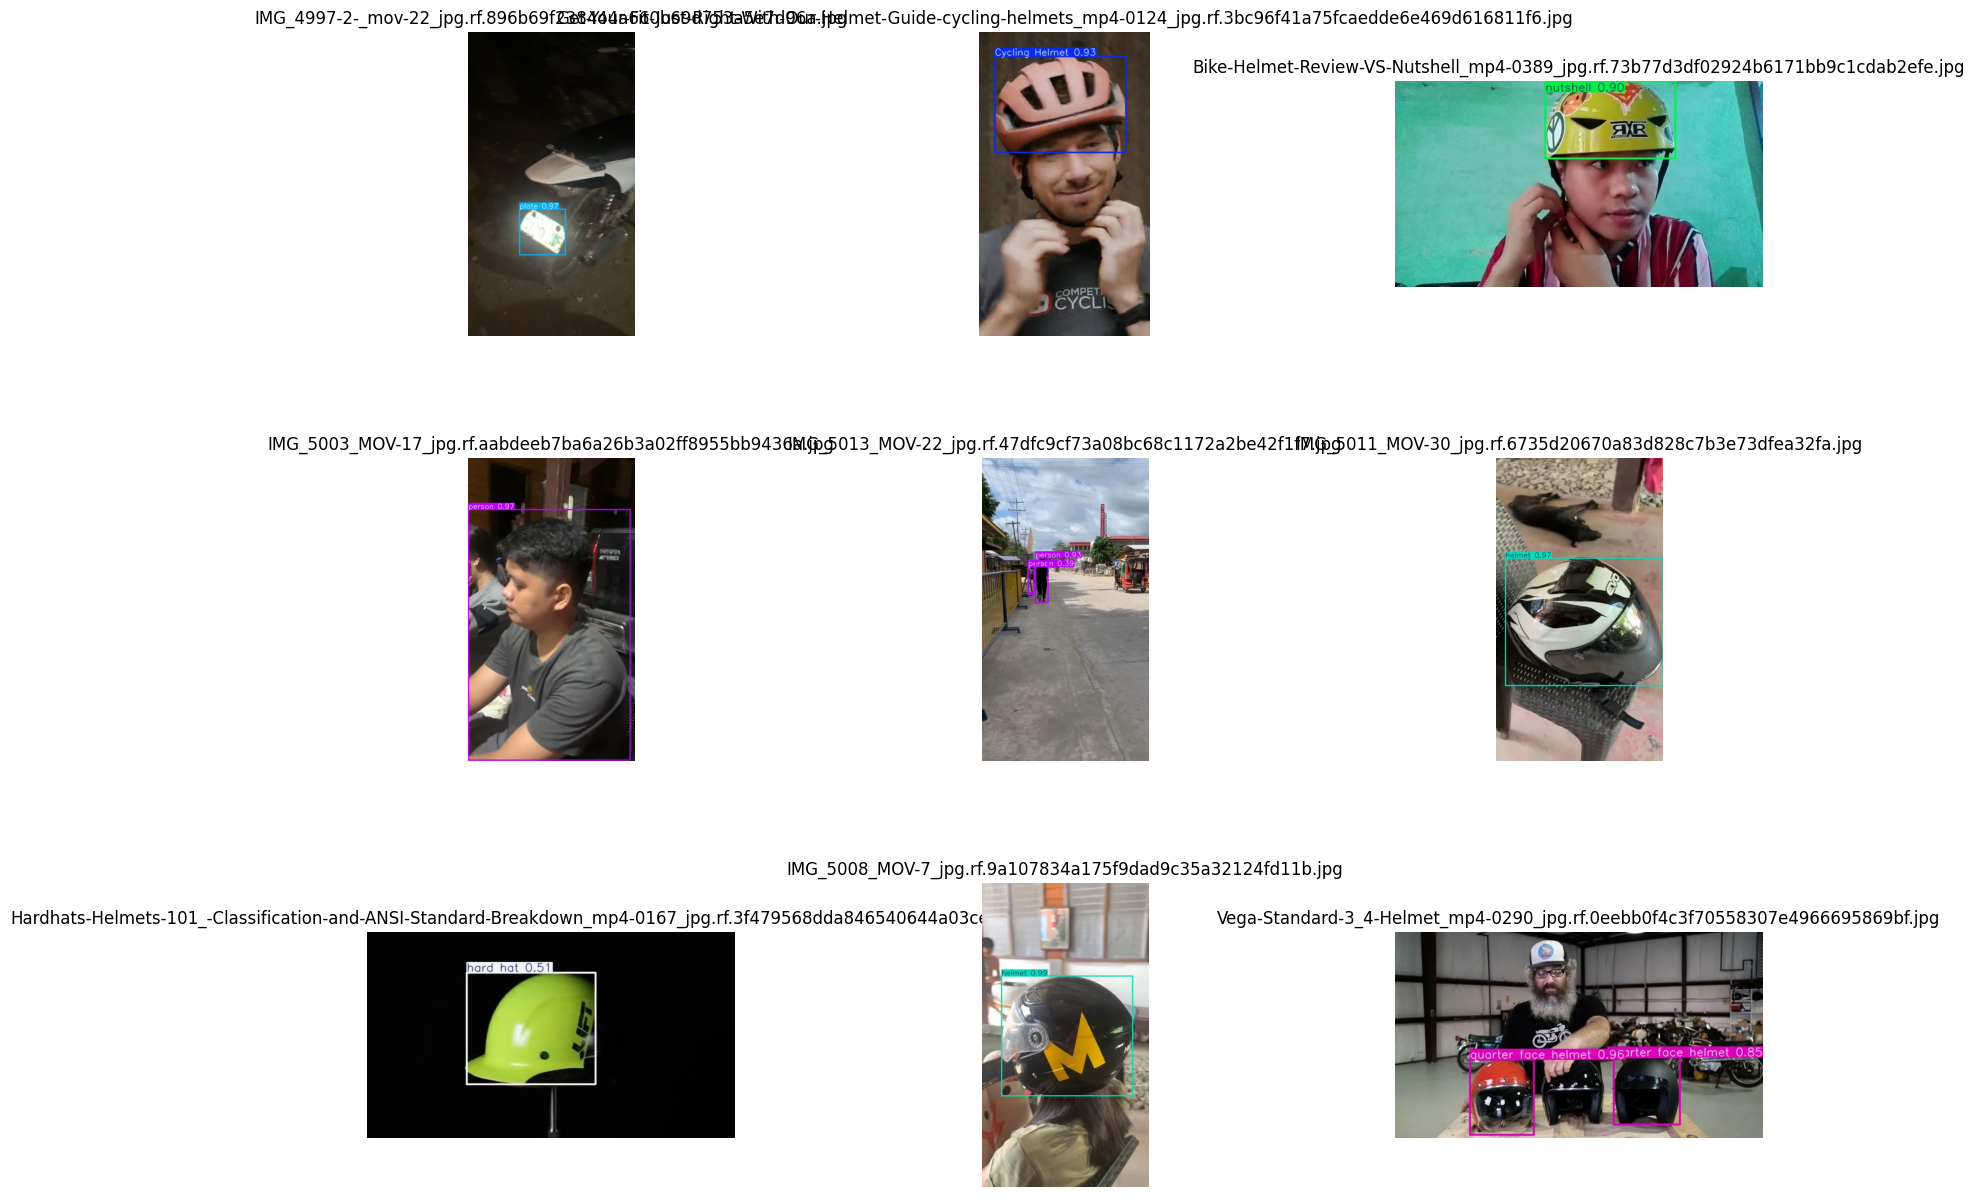

In [18]:
import glob
import os
import matplotlib.pyplot as plt
from IPython.display import display

# Find the latest folder
latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)

# Get the first 9 images (3 rows × 3 columns)
images = glob.glob(f'{latest_folder}/*.jpg')[:9]

# Plot images in 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Larger figsize for bigger images
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Add spacing between images

for ax, img_path in zip(axes.flatten(), images):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axis
    ax.set_title(os.path.basename(img_path), fontsize=12)  # Set title as image name with larger font

plt.show()

In [19]:
!yolo task=detect mode=predict model= "/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source=/kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg save=True

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /kaggle/working/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg: 640x384 1 sports helmet, 57.9ms
Speed: 5.8ms preprocess, 57.9ms inference, 161.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


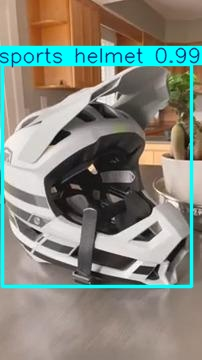

In [20]:
Image("/kaggle/working/runs/detect/predict2/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg", width=600)

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Step # 08  Inference with Custom Model on Videos</h2>

In [21]:
!yolo task=detect mode=predict model= "/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=Tru

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 986, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 550, in predict
    self.predictor = (predictor or self._smart_load("predictor"))(overrides=args, _callbacks=self.callbacks)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 91, in __init__
    self.args = get_cfg(cfg, overrides)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 318, in get_cfg
    check_cfg(cfg)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 379, in check_cfg
    raise TypeError(
TypeError: 'save=Tru' is of invalid type str. 'save' must be a bool (i.e. 'save=True' or 'save=False')
Sentry is attempting to sen

In [22]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)

FileNotFoundError: [Errno 2] No such file or directory: '/content/result_compressed.mp4'

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;"> Please like, share, and Upvote My Notebook </h2>

## Author
**Md. Rasel Sarker**  
Email: [rasel.sarker6933@gmail.com](mailto:rasel.sarker6933@gmail.com)  


<h1 align="left">
 <h2><img src = "https://media2.giphy.com/media/QssGEmpkyEOhBCb7e1/giphy.gif?cid=ecf05e47a0n3gi1bfqntqmob8g9aid1oyj2wr3ds3mg700bl&rid=giphy.gif" width=30px valign="bottom"> 🌐 Connect with Me:</h2>
</h1>

<p align="center">
  <a href="mailto:rasel.sarker6933@gmail.com"><img src="https://img.shields.io/badge/Email-rasel.sarker6933@gmail.com-blue?style=flat-square&logo=gmail"></a>
  <a href="https://github.com/raselsarker69"><img src="https://img.shields.io/badge/GitHub-%40Raselsarker-lightgrey?style=flat-square&logo=github"></a>
  <a href="https://www.linkedin.com/in/rasel-sarker-405160227/"><img src="https://img.shields.io/badge/LinkedIn-Rasel%20Sarker-blue?style=flat-square&logo=linkedin"></a>
  <a href="https://www.facebook.com/mdrasel.sarker.7773631"><img src="https://img.shields.io/badge/Facebook-%40Raselsarker-blue?style=flat-square&logo=facebook"></a>
  <a href="https://www.kaggle.com/mdraselsarker"><img src="https://img.shields.io/badge/Kaggle-%40Raselsarker-blue?style=flat-square&logo=kaggle"></a>
  <a href="https://www.youtube.com/@raselsarker69"><img src="https://img.shields.io/badge/YouTube-Rasel%20Sarker-red?style=flat-square&logo=youtube"></a>
  <a href="https://www.facebook.com/groups/832585175685301"><img src="https://img.shields.io/badge/Facebook%20Group-Rasel%20Sarker%20Group-blue?style=flat-square&logo=facebook"></a>
  <br>
  <img src="https://img.shields.io/badge/Phone-%2B8801581528651-green?style=flat-square&logo=whatsapp">
</p>
 

---

<div align="center">

Thank you for visiting my repository. I hope these projects inspire and guide your learning journey!

---

Feel free to explore, learn, and build upon these projects. Happy coding!<br>

&copy; 2025 ML Finall Projects.

</div>